<font size=5><b>E-commerce — Анализ товарного ассортимента</b></font>

<font size=5><b>Анализ интернет-магазина товаров для дома и быта "Пока все ещё тут"</b></font>

## Задача:

Проанализировать товарный ассортимент. 


- Проведите исследовательский анализ данных
- Проанализируйте торговый ассортимент
- Сформулируйте и проверьте статистические гипотезы

**Описание данных:**

Датасет представляет собой историю транзакций интернет-магазина товаров для дома и быта "Пока все ещё тут".

Файл ecommerce_dataset.csv содержит колонки:

- date — Дата заказа
- customer_id — Идентификатор покупателя
- order_id — Идентификатор заказа
- product — Наименование товара
- quantity — Количество товара в заказа
- price — Цена товара

В проекте отдельно укажите 5-10 источников (документация, статьи), которые вы использовали во время работы. Кратко опишите ответы на какие вопросы вы нашли в них.

По итогам исследования подготовьте презентацию. Для создания презентации используйте любой удобный инструмент, но отправить презентацию нужно обязательно в формате pdf.

## Шаги выполнения работы:

### ШАГ 1: Общее изучение данных
- Открытие и изучение файла с данными.

### ШАГ 2: Предобработка данных

- Определение есть ли в данных пропущенные значения и заполнение их по возможности;
- Проверка типов данных : изменение их в случае необходимости;
- Проверка наличия дубликатов: описание возможных причин их появления;

### ШАГ 3: Исследовательский анализ данных

- Изучение распределения данных - есть ли аномальные значения (выбросы)? Определение порога отcечения аномалий, если от них следует избавиться. Возможные причины наличия таких аномалий.
- Исследование среднего количества товаров в 1 заказе. Средняя/минимальная и максимальная цена товара.
- Изучение средней стоимости заказа, максимального и минимального размера стоимости заказа. Граница стоимости 75% заказов.
- Категоризация товаров в ассортименте по ценовому сегменту.
- Разделение ассортимента товаров на основной и дополнительный.

### ШАГ 4: Проверка статистических гипотез

- 1) Проверка гипотезы о том, что средняя стоимость заказа в весенний период (март-май) отличается от стоимости в другие месяцы.
- 2)  Проверка гипотезы о том, что среднее количество заказов в весенний период (март-май) отличается по количеству в другие месяцы.
- 3) Проверка гипотезы о том, что средняя стоимость товаров основного ассортимента отличается от стоимости дополнительного.

### ШАГ 5: Применение методов машинного обучения

- Сегментация ассортимента методом ML, с целью выявить сегменты с максимальной долей основного ассортимента.
- Рассмотрение распределения признаков для различных сегментов.
- Выявление наиболее перспективных кластеров товаров, которым стоит уделить максимум внимания отделу развития магазина.

### ШАГ 6: Вывод

- Вывод о том какой ассортимент следует закупать магазину в первую очередь, какой во вторую, а на какой вообще не стоит тратиться.


Ссылка на презентацию: https://yadi.sk/i/vV6o7JtYtzp4IA

In [161]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import numpy as np
import plotly.figure_factory as ff
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from pymystem3 import Mystem
m = Mystem()
from collections import Counter
import plotly.graph_objects as go
import numpy as np
import plotly.figure_factory as ff
from scipy import stats as st


#обозначим, что хотим видеть все столбцы в датафреймах
pd.set_option('display.max_columns', 30)
pd.set_option('display.max_colwidth', None)

### ШАГ 1: Общее изучение данных

In [162]:
data = 'ecommerce_dataset.csv'

In [163]:
logs = pd.read_csv(data, sep=',')
logs.head(10)

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0


### ШАГ 2: Предобработка данных

In [164]:
# изучим наличие пропусков и типы данных
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


In [165]:
# приведем дату заказа к формату дат
logs['date'] = pd.to_datetime(logs['date'], format='%Y%m%d%H')
logs['date']

0      2018-10-01 00:00:00
1      2018-10-01 00:00:00
2      2018-10-01 00:00:00
3      2018-10-01 00:00:00
4      2018-10-01 00:00:00
               ...        
6732   2019-10-31 11:00:00
6733   2019-10-31 12:00:00
6734   2019-10-31 13:00:00
6735   2019-10-31 14:00:00
6736   2019-10-31 16:00:00
Name: date, Length: 6737, dtype: datetime64[ns]

In [166]:
logs.duplicated().sum()

0

In [167]:
# добавим столбец - месяц покупки
logs['month'] = pd.DatetimeIndex(logs['date']).month

In [168]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
 6   month        6737 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 368.6+ KB


In [169]:
logs.head(10)

,date,customer_id,order_id,product,quantity,price,month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,10
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,10
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,10
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,10
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,10


### Вывод:

Пропуски и дубликаты отсутствуют, названия столбцов корректны, типы данных приведены требуемым.

### ШАГ 3: Исследовательский анализ данных

In [170]:
# исследуем распределение данных
logs.describe()

,order_id,quantity,price,month
count,6737.000000,6737.000000,6737.000000,6737.000000
mean,43128.948345,2.501559,462.028499,6.415764
std,27899.414662,15.266478,871.296064,3.035431
min,12624.000000,1.000000,9.000000,1.000000
25%,14827.000000,1.000000,101.000000,4.000000
50%,68503.000000,1.000000,135.000000,6.000000
75%,70504.000000,1.000000,398.000000,9.000000
max,73164.000000,1000.000000,14917.000000,12.000000


- Видим, что 75% заказов насчитывают 1 единицу продукции и не дороже 398 рублей

In [171]:
# посмотрим распределение количества товаров в заказах - один из заказов резко выпадает из общей картины, посмотрим что это далее
fig = px.box(logs, y='quantity')
fig.show()

In [172]:
# это заказ 1000 вантузов, принимаю решение такой заказ удалить, так как считаю его неправдоподобным
quantity = logs.pivot_table(index=['order_id', 'product'], values='quantity', aggfunc='sum').sort_values(by='quantity', ascending=False).head(10)
quantity

,,quantity
order_id,product,
71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000
71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334
68611,"Крепеж для пружины дверной, 1107055",300
71478,Муляж ЯБЛОКО 9 см красное,300
68611,"Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014",300
69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200
68815,Муляж ЯБЛОКО 9 см красное,170
72845,Муляж Яблоко зеленый 9 см полиуретан,160
70841,Плечики пластмассовые Размер 52 - 54 Тула 1205158,150


In [173]:
# удалим товарища с 1000 вантузов из расчетов, как аномальный заказ
logs = logs.drop([5456]).reset_index(drop=True)

In [174]:
# закупка муляжей, вешалок, пружин и скоб в количестве в диапазоне 140-300 будем считать нормальной (как вариант для нужд ИП)
quantity = logs.pivot_table(index=['order_id', 'product'], values='quantity', aggfunc='sum').sort_values(by='quantity', ascending=False)
quantity.head(10)

quantity
order_id product                                                                       
71668    Вешалки мягкие для деликатных вещей 3 шт шоколад                           334
71478    Муляж ЯБЛОКО 9 см красное                                                  300
68611    Крепеж для пружины дверной, 1107055                                        300
         Пружина дверная 240 мм оцинкованная (Д-19 мм) без крепления, 1107014       300
69289    Ручка-скоба РС-100 белая *Трибатрон*, 1108035                              200
68815    Муляж ЯБЛОКО 9 см красное                                                  170
72845    Муляж Яблоко зеленый 9 см полиуретан                                       160
70841    Плечики пластмассовые Размер 52 - 54 Тула 1205158                          150
68831    Муляж ЯБЛОКО 9 см красное                                                  140
68668    Щетка для посуды *Мила* SV3182 1807009                                     100

In [175]:
# у нас присутствуют заказы, растянутые по времени - рекордсмены дотягивают до полугода при выборе товаров
orders_gr = logs.groupby(['customer_id', 'order_id']).agg({'date': 'nunique'}).\
reset_index().sort_values(by='date', ascending=False)
orders_gr.head(10)

,customer_id,order_id,date
307,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,74
923,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,60
1476,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,23
1809,ae6940d3-a1c7-4997-8853-a5b8afc60d51,71148,16
1043,63b6c7b2-f6c2-4a42-ba02-1910ec67f57e,70419,10
2574,eb04c06f-bee9-45bd-9392-4addbc54952f,69527,9
1806,ae39cf6e-335b-498b-8896-c9330756f56c,71463,9
2019,bfacecbe-1f6c-435b-996c-a812f988cf65,70962,8
2505,e382d4c4-a4c9-44d3-97a0-a8868e122563,69531,7
1934,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,13547,7


- Существуют заказы, с количеством дат больше одной, в логах фиксируются какие-то другие стадии, помимо покупки товара.

In [176]:
#отфильтруем заказы по дате
logs_new = logs.sort_values(by='date', ascending=True)
logs_new.head(5)

,date,customer_id,order_id,product,quantity,price,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10


In [177]:
# удалим все получившиеся дублирующиеся блоки (юзер - номер заказа - продукт)
good_logs = logs_new.drop_duplicates(['customer_id', 'order_id', 'product'], keep='last')
good_logs = good_logs.reset_index(drop=True)
good_logs

,date,customer_id,order_id,product,quantity,price,month
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10
...,...,...,...,...,...,...,...
4845,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,10
4846,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,10
4847,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,10
4848,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,10


In [178]:
#отфильтруем заказы по номеру и уникальному юзеру.
id_vs_order = good_logs.groupby('order_id').agg({'customer_id': 'nunique'}).sort_values('customer_id', ascending=False)
id_vs_order

,customer_id
order_id,
72845,4
71480,3
69485,3
70903,2
71226,2
...,...
69528,1
69532,1
69533,1


- Существуют заказы, к которым привязаны НЕ ОДИН! customer_id, список с номерами таких заказов ниже.

In [179]:
orders_multi_users_bug = id_vs_order.query('customer_id > 1')
orders_multi_users_bug.head(10)

,customer_id
order_id,
72845,4
71480,3
69485,3
70903,2
71226,2
71663,2
71648,2
69283,2
70631,2


In [180]:
# здесь можно посмотреть детализированно каждый из заказов, подставив номер из списка выше:
orders_multi_users_bug_check = logs[logs['order_id'] == 72845]
orders_multi_users_bug_check 

,date,customer_id,order_id,product,quantity,price,month
6503,2019-10-03 14:00:00,d8465f63-35db-4809-aff3-a8f7ebfc257f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,10
6504,2019-10-03 15:00:00,0309d37c-ab5f-4793-ba72-5484c019b840,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,10
6507,2019-10-04 08:00:00,25a8cd52-3efa-48ee-a6bd-d413d7e2b42f,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,10
6537,2019-10-07 20:00:00,2ac05362-3ca7-4d19-899c-7ba266902611,72845,Муляж Яблоко зеленый 9 см полиуретан,40,59.0,10


In [181]:
#посмотрим распределение цен товаров в заказах - один из заказов резко выпадает из общей картины, посмотрим что это далее
fig = px.box(good_logs, y='price')
fig.show()

In [182]:
# посмотрим, что за товары у нас явно выделяются по цене из основной массы
price = good_logs.pivot_table(index=['order_id', 'product'], values='price', aggfunc='max').sort_values(by='price', ascending=False)
price.head(10)

,,price
order_id,product,
72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,14917.0
71035,"Сумка-тележка хозяйственная Andersen Royal Shopper, Hera, синяя 166-004-90",8737.0
70423,"Сумка-тележка хозяйственная Andersen Alu Star Shopper, Hava, синяя 115-103-90",8437.0
71227,Сумка-тележка хозяйственная Rolser MNB019 rojo LOGIC DOS+2 красная,8077.0
72992,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 см алюминиевая с лотком для инструментов,7724.0
70740,Сумка-тележка хозяйственная Rolser IMX006 bassi Logic Tour бордовая,7679.0
72140,Сумка-тележка хозяйственная Rolser MNB017 fucsia LOGIC DOS+2 фуксия,7679.0
68872,Сумка-тележка хозяйственная Rolser MOU041 malva RD6 сиреневая,7597.0
69417,Гладильная доска Leifheit AirBoard Compact M Plus 120х38 см малиновый 71630,7424.0


- Не смотря на большой разброс в диапазоне цен, сильно выбивающиеся цены являются рыночными, поэтому удалять такие товары не следует.

#### Исследуем среднюю/минимальную и максимальную цену товара:

In [183]:
# 75% товаров стоят дешевле 498 рублей
good_logs['price'].describe()

count     4850.000000
mean       516.060206
std        946.179939
min          9.000000
25%         90.000000
50%        150.000000
75%        498.500000
max      14917.000000
Name: price, dtype: float64

In [184]:
#посмотрим цены на товары
items_price = good_logs['price'].describe().reset_index()
items_price

,index,price
0,count,4850.000000
1,mean,516.060206
2,std,946.179939
3,min,9.000000
4,25%,90.000000
5,50%,150.000000
6,75%,498.500000
7,max,14917.000000


<Figure size 432x288 with 0 Axes>

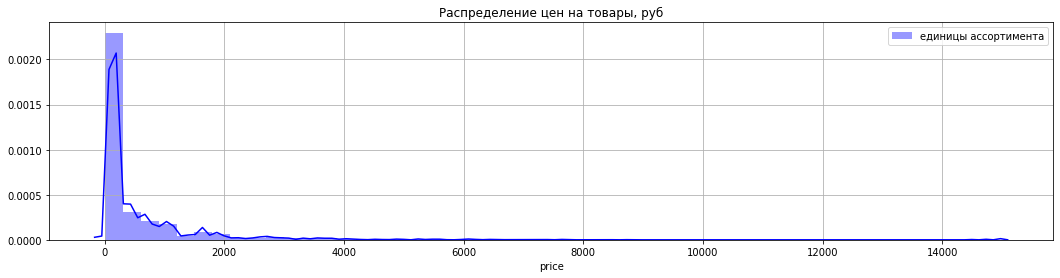

<Figure size 432x288 with 0 Axes>

In [185]:
#посмотрим распределение цен на товары
plt.figure(figsize=(18,4))
sns_plot = sns.distplot(good_logs['price'], color='blue', label='единицы ассортимента')
plt.title('Распределение цен на товары, руб')

plt.legend()
fig = sns_plot.get_figure()
plt.grid()
plt.figure()

In [186]:
print('Минимальная цена товара ассортимента: {:.0f} руб.'.format(items_price.iloc[3, 1]))
print('Средняя цена товара ассортимента: {:.0f} руб., 50% товаров ее не превышают.'.format(items_price.iloc[5, 1]))
print('Максимальная цена товара ассортимента: {:.0f} руб.'.format(items_price.iloc[7, 1]))
print('Для 75% товаров цена не превышает: {:.0f} руб.'.format(items_price.iloc[6, 1]))

Минимальная цена товара ассортимента: 9 руб.
Средняя цена товара ассортимента: 150 руб., 50% товаров ее не превышают.
Максимальная цена товара ассортимента: 14917 руб.
Для 75% товаров цена не превышает: 498 руб.


In [187]:
# посмотрим, каких товаров продается больше всего - лидирует герань и сумка-тележка
good_logs['product'].value_counts().rename_axis('product').reset_index(name='counts').head(11)

,product,counts
0,Пеларгония розебудная Red Pandora укорененный черенок,66
1,Пеларгония розебудная Prins Nikolai укорененный черенок,57
2,Пеларгония зональная диам. 12 см сиреневый полумахровый,52
3,Сумка-тележка 2-х колесная Gimi Argo синяя,47
4,Пеларгония розебудная Mary укорененный черенок,39
5,Пеларгония розебудная Queen Ingrid укорененный черенок,30
6,Пеларгония розебудная Margaretha укорененный черенок,29
7,Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок,24
8,Пеларгония зональная диам. 12 см коралловая полумахровая,24
9,Пеларгония зональная махровая лососевая,24


#### Исследуем среднее/минимальное и максимальное количество товаров в 1 заказе:

In [188]:
# посмотрим количество товаров в заказах по убыванию
items_per_order = good_logs.groupby(['order_id']).agg({'product': 'count'}).\
reset_index().sort_values(by='product', ascending=False)
items_per_order.head(5)

,order_id,product
137,14698,51
145,14715,36
129,14688,31
164,14753,30
222,14835,29


In [189]:
#посмотрим распределение количества товаров в заказах 
items_per_order1 = items_per_order['product'].describe().reset_index()
items_per_order1

,index,product
0,count,2783.000000
1,mean,1.742724
2,std,2.797233
3,min,1.000000
4,25%,1.000000
5,50%,1.000000
6,75%,1.000000
7,max,51.000000


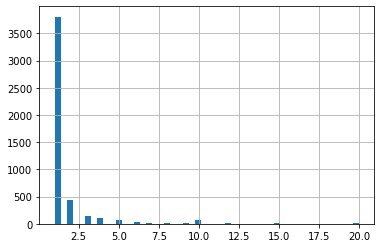

In [190]:
# абсолютное большинство товаров покупают по 1 штуке
good_logs['quantity'].hist(bins=50, range = (1, 20))

In [191]:
print('Минимальное количество товаров в заказе: {:.0f}'.format(items_per_order1.iloc[3, 1]))
print('Среднее количество товаров в заказе: {:.0f}'.format(items_per_order1.iloc[5, 1]))
print('Максимальнее количество товаров в заказе: {:.0f}'.format(items_per_order1.iloc[7, 1]))

Минимальное количество товаров в заказе: 1
Среднее количество товаров в заказе: 1
Максимальнее количество товаров в заказе: 51


#### Изучим среднюю стоимость заказа, максимальный и минимальный размер стоимости заказа. Размер стоимости 75% заказов.

In [192]:
#создадим столбец расчета общей стоимости товара в заказе
good_logs['total_price'] = good_logs['quantity']*good_logs['price']

In [193]:
# посмотрим общую стоимость заказов
orders_value = good_logs.groupby(['order_id']).agg({'total_price': 'sum'}).\
reset_index().sort_values(by='total_price', ascending=False)
orders_value.head(5)

,order_id,total_price
2008,71668,49432.0
1065,69830,47385.0
722,69156,33680.0
917,69504,32718.0
569,68878,24370.0


In [194]:
#посмотрим общую стоимость заказов в долях
orders_value1 = orders_value['total_price'].describe().reset_index()
orders_value1

,index,total_price
0,count,2783.000000
1,mean,1242.922745
2,std,2239.492270
3,min,14.000000
4,25%,292.000000
5,50%,689.000000
6,75%,1474.000000
7,max,49432.000000


<Figure size 432x288 with 0 Axes>

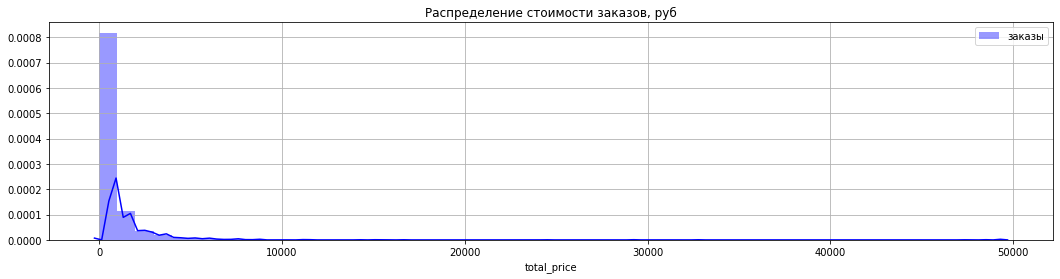

<Figure size 432x288 with 0 Axes>

In [195]:
#посмотрим распределение цен на товары
plt.figure(figsize=(18,4))
sns_plot = sns.distplot(good_logs['total_price'], color='blue', label='заказы')
plt.title('Распределение стоимости заказов, руб')

plt.legend()
fig = sns_plot.get_figure()
plt.grid()
plt.figure()

In [196]:
print('Минимальная стоимость заказа: {:.0f} руб.'.format(orders_value1.iloc[3, 1]))
print('Средняя стоимость заказа: {:.0f} руб., 50% заказов ее не превышают.'.format(orders_value1.iloc[5, 1]))
print('Максимальная стоимость заказа: {:.0f} руб.'.format(orders_value1.iloc[7, 1]))
print('75% заказов не превышают: {:.0f} руб.'.format(orders_value1.iloc[6, 1]))

Минимальная стоимость заказа: 14 руб.
Средняя стоимость заказа: 689 руб., 50% заказов ее не превышают.
Максимальная стоимость заказа: 49432 руб.
75% заказов не превышают: 1474 руб.


In [197]:
# выводим список всех уникальных значений столбца product
word_list = good_logs['product'].unique()
word_list

array(['Комнатное растение в горшке Алое Вера, d12, h30',
       'Комнатное растение в горшке Кофе Арабика, d12, h25',
       'Радермахера d-12 см h-20 см', ...,
       'Сушилка для белья на ванну FREUDENBERG (GIMI) Alablock Varadero silver A4P',
       'Каланхое каландива малиновое d-7 см', 'Литопс Микс d-5 см'],
      dtype=object)

In [198]:
# объединяем уникальные значения purpose  в строку и леммитизируем ее, 
#при этом применяем counter для подсчета всех уникальных лемм

product_type_list = good_logs['product'].unique()
purpose_string = ' '.join(product_type_list)
lemmas = m.lemmatize(purpose_string)

In [199]:
#создаем пустой столбец для внесения лемм товаров
good_logs['lemmas_product'] = " "

In [200]:
#лемматизируем столбец products
good_logs['lemmas_product'] = good_logs['product'].apply(lambda x: ' '.join(m.lemmatize(x)).strip())
good_logs.head(5)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30"
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25"
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см


In [201]:
# добавим новый столбец 'lemmas_product' в logs 
good_logs['product_category'] = " "
good_logs.head(5)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30",
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25",
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см,
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см,
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см,


In [202]:
categories = { 
    'Посуда и кухонные принадлежности': ['тарелка','венчик', 'косточка', 'вилка', 'сковорода',  # кстати переносы строк \ тут не нужны
                                          'скалка', 'терка', 'толкушка', 'блюдо', 'термос', 'сотейник', 
                                                    'ложка', 'кружка', 'половник', 'Luminarc', 'Luminarc', 
                                                    'нож', 'скатерть', 'котел', 'термокружок', 
                                                    'салфетница', 'столовый','сервировочный', 'заварочный',
                                                    'хлебница', 'кухня', 'кастрюля', 'посуда', 'кувшин', 
                                                    'тортница', 'контейнер', 'овощечистка', 'банка', 'миска', 'кухонный',
                                                    'свч', 'банка', 'заварочный', 'салатник', 'дуршлаг'],  # и остальные товары из категории кухонных принадлежностей
    'Растения (комнатные, рассада, прочие)': ['пеларгония', 'кассета', 'рассада', 'растение', 'd -', 'растение', 
                                              'калибрахоа', 'декабрист', 'сорт','петуния', 'ампельный', 
                                              'роза', 'гвоздик', 'дерево','кашпо', 'цикламен', 'нидерланды', 'примула',
                                              'папоротник', 'плющ', 'лиана', 'хоста', 'фуксия'],  # аналогично продукты из этой категории
    'Сушилки для белья': ['сушилка'],    
    'Хранение вещей': ['одежда', 'костюм', 'плечики', 'вешалка', 'стеллаж', 'кофр','обувница', 'корзина', 
                       'корзинка', 'этажерка', 'хранение', 'бак'],
    'Постельные принадлежности, текстиль, одеяла, наматрацники': ['простыня', 'одеяло', 'наматрацник','пододеяльник', 
                                                                  'наволочка', 'полотенце', 'покрывало', 'наматрасник', 
                                                                  'плед', 'наматрицник', 'белье'],
    'Декор, интерьер, мебель': ['искусственный', 'искуственный', 'цветок', 'пуф','комод', 'интерьерный', 'муляж', 
                                'декоративный', 'светильник'],
    'Сумки-тележки': ['колесо', 'сумка', 'тележка'],


    'Все для ремонта': ['стремянка', 'скоба', 'пружина', 'крепеж', 'уголок', 'завертка', 'шпингалет', 'крючок', 
                        'петля', 'стяжка', 'инструмент', 'полка', 'полк', 'фал', 'напильник', 'насадка валик'],

    'Гладильные доски': ['доска', 'подкладка', 'чехол', 'гладильный', 'подрукавник'],
    'Ерши для унитаза и вантузы': ['ерш', 'вантуз'],
    'Тазы, корыта, ведра, ковши': ['таз', 'ведро', 'корыто', 'ковш'],
    'Товары для ванной': ['ванный', 'халат', 'ванна', 'зубной', 'карниз', 'противоскользящий', 'мыло'],
    'Все для уборки': ['веник', 'совок', 'швабра', 'мусорный', 'мусор', 'салфетка', 'щетка', 'перчатка', 'сметка', 'мусор', 
                       'окномойка', 'тряпка', 'микрофибры'],
    'Урны, термометры, коврики придверные': ['урна', 'придверный', 'термометр', 'коврик', 'влаговпитывающий'],
    'Мелкая бытовая техника': ['чайник', 'электроштопор', 'пылесос', 'мантоварка', 'миксер', 'овощеварка', 'весы', 
                               'пароварка','соковарка', 'утюг', 'фен']   
}

In [203]:
def classify(lemmas_product):
    # проходим по словарю categories
    
    for category, product_list in categories.items():
        # перебираем название товара с списке каждой категории       
        for product in product_list:
            if product in lemmas_product:
                return category
             
    return 'Прочие товары'

In [204]:
good_logs['product_category'] = good_logs.lemmas_product.apply(classify)
good_logs

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30","Растения (комнатные, рассада, прочие)"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25","Растения (комнатные, рассада, прочие)"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см,"Растения (комнатные, рассада, прочие)"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см,"Растения (комнатные, рассада, прочие)"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см,"Растения (комнатные, рассада, прочие)"
...,...,...,...,...,...,...,...,...,...,...
4845,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,10,404.0,"таз пластмассовый 40 , 0 л пищевой овальный ( Иж ), 1404094","Тазы, корыта, ведра, ковши"
4846,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,10,1087.0,сумка - тележка 2 - х колесный Gimi Argo синий,Сумки-тележки
4847,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,10,157.0,"герань домашний ( пеларгония зональный ) цвести D12 , H25 - 30 , малиновый с красный , полумахровый","Растения (комнатные, рассада, прочие)"
4848,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,10,397.0,"таз пластмассовый со стиральный доска ( Иж ), 1404021",Гладильные доски


In [205]:
#создадим фильтр общей стоимости товаров по заказам в разрезе категорий (можно подставить в код название категории)
product_cat_check = good_logs.query('product_category == "Постельные принадлежности, текстиль, одеяла, наматрацники"').sort_values(by='total_price', ascending=False)
product_cat_check.head(10)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category
1295,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755.0,1,47385.0,простыня вафельный 200х180 см WELLNESS RW180 - 01 100 % хлопок,"Постельные принадлежности, текстиль, одеяла, наматрацники"
2527,2019-04-19 19:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568.0,4,15680.0,одеяло Wellness T142 белый темостеганый 140х205 см чехол 100 % полиэстер 200 г / м 4690659000306,"Постельные принадлежности, текстиль, одеяла, наматрацники"
2524,2019-04-19 18:00:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,"Наматрацник Natures Бархатный бамбук ББ-Н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый",12,1183.0,4,14196.0,"наматрацник Natures бархатный бамбук ББ - н - 1 - 2 односпальный , 100 % хлопок , стеганый 90х200 см , с резинка по угол , белый","Постельные принадлежности, текстиль, одеяла, наматрацники"
982,2018-12-06 17:00:00,82b56a76-0dc9-4dae-aa76-863a9a80f082,69236,Покрывало жаккард KARNA стеганое KALVEN 260x260 см наволочки 50х70 см 2 шт 8681914002162,1,6134.0,12,6134.0,покрывало жаккард KARNA стеганый KALVEN 260x260 см наволочка 50х70 см 2 шт 8681914002162,"Постельные принадлежности, текстиль, одеяла, наматрацники"
1257,2019-01-10 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69766,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,3,1949.0,1,5847.0,простыня вафельный 200х180 см WELLNESS RW180 - 01 100 % хлопок,"Постельные принадлежности, текстиль, одеяла, наматрацники"
970,2018-12-04 20:00:00,13ff36b4-cbf6-491e-9801-765785a1a2fd,69210,Покрывало жаккард шенилл BIRHOME VALENTIN 240х260 см наволочки 50х70 см 2 шт 9234567089661,1,4859.0,12,4859.0,покрывало жаккард шенилл BIRHOME VALENTIN 240х260 см наволочка 50х70 см 2 шт 9234567089661,"Постельные принадлежности, текстиль, одеяла, наматрацники"
4720,2019-10-11 18:00:00,61467178-1b59-4c2b-bba7-ced50d80e11f,72936,"Одеяло Wellness 1410 пуховое белое, 100% белый пух 500 гр, 140х200 см, 4607101064199",1,4724.0,10,4724.0,"одеяло Wellness 1410 пуховый белый , 100 % белый пух 500 гр , 140х200 см , 4607101064199","Постельные принадлежности, текстиль, одеяла, наматрацники"
442,2018-10-29 17:00:00,9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,68760,"Наматрасник Wellness WM180, 100% хлопок, 180х200 см, стеганый белый, 4607101067749",1,3074.0,10,3074.0,"наматрасник Wellness WM180 , 100 % хлопок , 180х200 см , стеганый белый , 4607101067749","Постельные принадлежности, текстиль, одеяла, наматрацники"
4141,2019-07-22 22:00:00,22773595-76a0-466b-a7e3-e88997de0c13,72069,Плед флисовый 200х150 см WELLNESS WPL152-Атланта_88 100 % полиэстер,3,712.0,7,2136.0,плед флисовый 200х150 см WELLNESS WPL152 - атланта _ 88 100 % полиэстер,"Постельные принадлежности, текстиль, одеяла, наматрацники"
4665,2019-10-06 12:00:00,7b0b570c-16c7-4aed-b302-13fe1830d1e9,72867,"Двуспальное постельное белье Wellness W185-Арктик, белый, 100% хлопок",1,2024.0,10,2024.0,"двуспальный постельный белье Wellness W185 - арктик , белый , 100 % хлопок","Постельные принадлежности, текстиль, одеяла, наматрацники"


In [206]:
#рассчет общей выручки с единицы ассортимента внутри категории (выбранной выше)
total_value_items_by_category = product_cat_check.groupby('product')['total_price'].\
sum().reset_index().sort_values(by='total_price', ascending=False)
total_value_items_by_category.head(15)

,product,total_price
31,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,53232.0
17,Одеяло Wellness T142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,15680.0
13,"Наматрацник Natures Бархатный бамбук ББ-Н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый",14196.0
24,Покрывало жаккард KARNA стеганое KALVEN 260x260 см наволочки 50х70 см 2 шт 8681914002162,6134.0
25,Покрывало жаккард шенилл BIRHOME VALENTIN 240х260 см наволочки 50х70 см 2 шт 9234567089661,4859.0
16,"Одеяло Wellness 1410 пуховое белое, 100% белый пух 500 гр, 140х200 см, 4607101064199",4724.0
12,"Наматрасник Wellness WM180, 100% хлопок, 180х200 см, стеганый белый, 4607101067749",3074.0
20,Плед флисовый 200х150 см WELLNESS WPL152-Атланта_88 100 % полиэстер,2136.0
3,"Двуспальное постельное белье Wellness W185-Арктик, белый, 100% хлопок",2024.0
5,Комплект постельного белья WELLNESS PLATINUM R185-Авеню пододеяльник 180х214 см простыня 200х214 см 2 наволочки 50х70 см,1912.0


In [207]:
# количество наименований товара, попавших в разные продуктовые категори:

categories_num = good_logs.groupby('product_category')['product'].nunique().reset_index().\
                 sort_values(by='product', ascending=False)
categories_num

,product_category,product
9,"Растения (комнатные, рассада, прочие)",834
7,Посуда и кухонные принадлежности,349
8,Прочие товары,190
2,Гладильные доски,120
13,Товары для ванной,117
15,Хранение вещей,114
10,Сумки-тележки,106
3,"Декор, интерьер, мебель",99
11,Сушилки для белья,95
0,Все для ремонта,76


In [208]:
# Количество единиц ассортимента по категориям товаров, %
labels = categories_num['product_category']
values = categories_num['product']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hoverinfo='label+percent+value', textinfo='value')])
fig.update_layout(
    title_text="Количество единиц ассортимента по категориям товаров, шт")
fig.show()

In [209]:
#подсчитаем общую выручку
total_revenue = good_logs['total_price'].sum()
print('Общая выручка магазина составляет: {:.0f} рублей'.format(total_revenue))

Общая выручка магазина составляет: 3459054 рублей


In [210]:
good_logs.head(11)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30","Растения (комнатные, рассада, прочие)"
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25","Растения (комнатные, рассада, прочие)"
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см,"Растения (комнатные, рассада, прочие)"
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см,"Растения (комнатные, рассада, прочие)"
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см,"Растения (комнатные, рассада, прочие)"
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,10,164.0,шеффлер лузеан d - 9 см,"Растения (комнатные, рассада, прочие)"
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,10,134.0,юкка нитчатый d - 12 см h - 25 - 35 см,"Растения (комнатные, рассада, прочие)"
7,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,10,269.0,"таз пластмассовый 21 , 0 л круглый "" водолей "" С614 , 1404056","Тазы, корыта, ведра, ковши"
8,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,10,824.0,настенный сушилка для белье Gimi Brio Super 100,Сушилки для белья
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,10,674.0,чехол для гладильный доска Colombo Persia Beige 130х50 см из хлопок 5379,Гладильные доски


In [211]:
revenue = good_logs.groupby('product_category')['total_price'].sum().reset_index().sort_values(by='total_price', ascending=False)
revenue['share_in_total_%'] = revenue['total_price']/total_revenue*100
revenue['share_in_total_%'] = revenue['share_in_total_%'].round(2)
revenue

,product_category,total_price,share_in_total_%
10,Сумки-тележки,701010.0,20.27
9,"Растения (комнатные, рассада, прочие)",577480.0,16.69
7,Посуда и кухонные принадлежности,377163.0,10.90
2,Гладильные доски,291048.0,8.41
11,Сушилки для белья,267886.0,7.74
0,Все для ремонта,224813.0,6.50
15,Хранение вещей,206717.0,5.98
13,Товары для ванной,180944.0,5.23
6,"Постельные принадлежности, текстиль, одеяла, наматрацники",127643.0,3.69
14,"Урны, термометры, коврики придверные",125344.0,3.62


In [212]:
revenue_top_5 = revenue.head(5)
revenue_top_5

,product_category,total_price,share_in_total_%
10,Сумки-тележки,701010.0,20.27
9,"Растения (комнатные, рассада, прочие)",577480.0,16.69
7,Посуда и кухонные принадлежности,377163.0,10.90
2,Гладильные доски,291048.0,8.41
11,Сушилки для белья,267886.0,7.74


In [213]:
# какой процент выручки дают нам 5 топоваых категорий товаров
revenue_top_5['share_in_total_%'].sum()
print('Доля в общей выручке от продаж 5 топовых категорий товаров: {:.0f} %.'.format(revenue_top_5['share_in_total_%'].sum()))

Доля в общей выручке от продаж 5 топовых категорий товаров: 64 %.


In [214]:
# добавим новый столбец 'assortment_type' в logs 
good_logs['assortment_type'] = " "

In [215]:
# соберем список топ 5 категорий - лидеров в объеме выручки
top_catecories_list = revenue_top_5['product_category'].tolist()
top_catecories_list

['Сумки-тележки',
 'Растения (комнатные, рассада, прочие)',
 'Посуда и кухонные принадлежности',
 'Гладильные доски',
 'Сушилки для белья']

In [216]:
# добавим признак важности ассортимента (основной/дополнительный):
for i in range(len(good_logs)):
    if good_logs['product_category'][i] in top_catecories_list:
        good_logs['assortment_type'][i] = 'Основной'
    else:
        good_logs['assortment_type'][i] = 'Дополнительный'

In [217]:
good_logs.head(11)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category,assortment_type
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30","Растения (комнатные, рассада, прочие)",Основной
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25","Растения (комнатные, рассада, прочие)",Основной
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см,"Растения (комнатные, рассада, прочие)",Основной
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см,"Растения (комнатные, рассада, прочие)",Основной
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см,"Растения (комнатные, рассада, прочие)",Основной
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,10,164.0,шеффлер лузеан d - 9 см,"Растения (комнатные, рассада, прочие)",Основной
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,10,134.0,юкка нитчатый d - 12 см h - 25 - 35 см,"Растения (комнатные, рассада, прочие)",Основной
7,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,10,269.0,"таз пластмассовый 21 , 0 л круглый "" водолей "" С614 , 1404056","Тазы, корыта, ведра, ковши",Дополнительный
8,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,10,824.0,настенный сушилка для белье Gimi Brio Super 100,Сушилки для белья,Основной
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,10,674.0,чехол для гладильный доска Colombo Persia Beige 130х50 см из хлопок 5379,Гладильные доски,Основной


In [218]:
# Доля категорий товаров в общих продажах, %
labels = revenue['product_category']
values = revenue['total_price']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hoverinfo='label+percent+value', textinfo='percent')])
fig.update_layout(
    title_text="Доля категорий товаров в общих продажах, %")
fig.show()

In [219]:
# выручка по категориям
revenue_for_bar = revenue.sort_values(by='total_price', ascending=True)

In [220]:
# Распределение общей выручки по категориям товаров, руб
import plotly.express as px
fig = px.bar(revenue_for_bar, x='total_price', y='product_category', orientation='h', text='total_price',\
             labels={'total_price':'общая выручка, руб', 'product_category':'категория товара' }, height=700)
fig.update_layout(title='Распределение общей выручки по категориям товаров, руб')
fig.show()

In [221]:
# Распределение количества купленых единиц товара по категориям
quantity = good_logs.groupby('product_category')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=True)
quantity 

,product_category,quantity
5,Мелкая бытовая техника,33
6,"Постельные принадлежности, текстиль, одеяла, наматрацники",109
4,Ерши для унитаза и вантузы,135
14,"Урны, термометры, коврики придверные",147
11,Сушилки для белья,215
13,Товары для ванной,255
2,Гладильные доски,273
12,"Тазы, корыта, ведра, ковши",338
10,Сумки-тележки,403
8,Прочие товары,437


In [222]:
#Распределение количества купленых единиц товара по категориям
fig = px.bar(quantity, x = 'quantity', y = 'product_category', orientation='h', text= 'quantity',\
            labels={'quantity':'куплено единиц товара', 'product_category':'категория товара' }, height=700)
          
fig.update_layout(title='Распределение количества купленых единиц товара по категориям')

fig.show()


<Figure size 432x288 with 0 Axes>

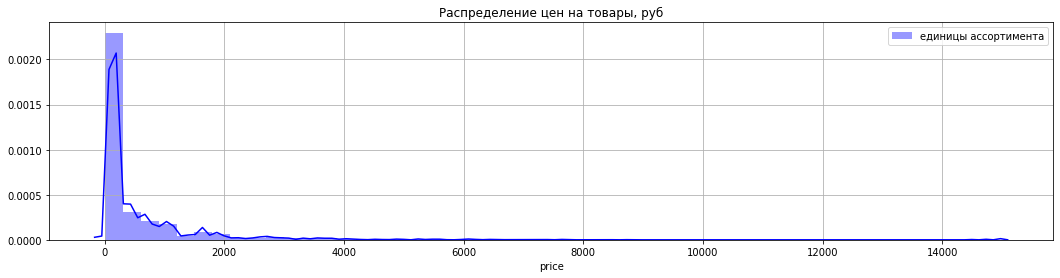

<Figure size 432x288 with 0 Axes>

In [223]:
#посмотрим распределение цен на товары
plt.figure(figsize=(18,4))
sns_plot = sns.distplot(good_logs['price'], color='blue', label='единицы ассортимента')
plt.title('Распределение цен на товары, руб')

plt.legend()
fig = sns_plot.get_figure()
plt.grid()
plt.figure()

In [224]:
# 75% товаров стоят дешевле 500 рублей
good_logs['price'].describe()

count     4850.000000
mean       516.060206
std        946.179939
min          9.000000
25%         90.000000
50%        150.000000
75%        498.500000
max      14917.000000
Name: price, dtype: float64

- Добавим ценовой диапазон товаров (поделим по 2 и 3 квартилю: до 150 руб, 150-500 руб, дороже 500 руб)

In [225]:
# добавим новый столбец 'assortment_type' в logs 
good_logs['price_range'] = " "

In [226]:
# добавим ценовой диапазон товаров
for i in range(len(good_logs)):
    if good_logs['price'][i] < 150:
        good_logs['price_range'][i] = 'до 150 руб'
    elif good_logs['price'][i] < 500:
        good_logs['price_range'][i] = '150-500 руб'
    else:
        good_logs['price_range'][i] = 'дороже 500 руб'

In [227]:
good_logs.head(5)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category,assortment_type,price_range
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30","Растения (комнатные, рассада, прочие)",Основной,до 150 руб
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25","Растения (комнатные, рассада, прочие)",Основной,150-500 руб
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см,"Растения (комнатные, рассада, прочие)",Основной,150-500 руб
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб


In [228]:
#посмотрим количество товаров в ценовых категориях
price_range = good_logs.groupby('price_range')['quantity'].sum().reset_index().sort_values(by='quantity', ascending=False)
price_range

,price_range,quantity
1,до 150 руб,8946
0,150-500 руб,2297
2,дороже 500 руб,1514


In [229]:
# Доля категорий товаров в общих продажах, %
labels = price_range['price_range']
values = price_range['quantity']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hoverinfo='label+percent+value', textinfo='percent+value')])
fig.update_layout(
    title_text="Доля различных ценовых категорий в общей выручке , %, ед.товара")
fig.show()

### Выводы

- Изучите распределение данных - есть ли аномальные значения (выбросы)? Определите порог отcечения аномалий, если от них следует избавиться. Предположите причины наличия таких аномалий:
       - удалены дублирующиеся по времени заказы - составлен баг-репорт
       - удален заказ с аномальным заказом товаров -  составлен баг-репорт
       - составлен баг-репорт о наличии заказов, привязанного к разным id пользователей
    
- Исследуйте среднее количество товаров в 1 заказе. Среднюю/минимальную и максимальную цену товара.
      - Минимальное количество товаров в заказе: 1
      - Среднее количество товаров в заказе: 1
      - Максимальнее количество товаров в заказе: 51       
      - Минимальная цена товара ассортимента: 9 руб.
      - Средняя цена товара ассортимента: 150 руб., 50% товаров ее не превышают.
      - Максимальная цена товара ассортимента: 14917 руб.
      - Для 75% товаров цена не превышает: 498 руб.
  
- Изучите среднюю стоимость заказа, максимальный и минимальный размер стоимости заказа. Границу стоимости 75% заказов.
      - Минимальная стоимость заказа: 14 руб.
      - Средняя стоимость заказа: 689 руб., 50% заказов ее не превышают.
      - Максимальная стоимость заказа: 49432 руб.
      - 75% заказов не превышают: 1474 руб.
- Категоризируйте товары в ассортименте по ценовому сегменту 
      - присвоены ценовые категории до 150 руб, 150-500 руб, дороже 500 руб. 

- Разделите ассортимент товаров на основной и дополнительный. 
      - ассортимент разделен.
        К основному ассортименту были отнесены категории топ 5 товаров по объему выручки:
           - 'Сумки-тележки',
           - 'Растения (комнатные, рассада, прочие)',
           - 'Посуда и кухонные принадлежности',
           - 'Гладильные доски',
           - 'Сушилки для белья'


### ШАГ 4: Проверка статистических гипотез

- Проверяю гипотезу в выходные люди тратят денег столько же, сколько и в будни
- Проверю зависимость продаж от категорий и уникальных клиентов
- Проверьте гипотезу о том, что средняя стоимость товаров основного ассортимента отличается от стоимости дополнительного.

#### Проверяю гипотезу в выходные люди тратят денег столько же, сколько и в будни

In [230]:
good_logs.head(1)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category,assortment_type,price_range
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30","Растения (комнатные, рассада, прочие)",Основной,до 150 руб


In [231]:
# logs['date_time'] = pd.to_datetime(logs['date'], format='%Y%m%d%H')

In [232]:
# logs.head(1)

In [233]:
good_logs['hour'] = good_logs['date'].dt.hour
#df['weekday'] = df['date_time'].dt.weekday

In [234]:
good_logs_night = good_logs.query('hour < 7 or hour > 22')
good_logs_day = good_logs.query('6 < hour < 23')

In [235]:
alpha = 0.05

results = st.ttest_ind(
    logs_night['price'], 
    logs_day['price'],
    )

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0006239852799444025
Отвергаем нулевую гипотезу


#### Выводы 
- Траты людей зависят от времени суток и дня недели

#### Проверю зависимость продаж от категорий и уникальных клиентов

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd64ff58e10>]],
      dtype=object)

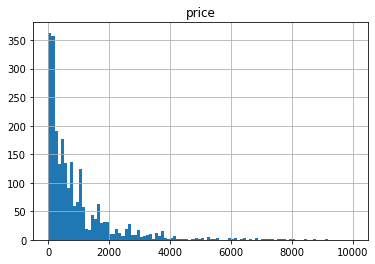

In [236]:
good_logs.groupby(['customer_id'])\
          .agg({'price':'sum'})\
          .reset_index()\
          .hist(bins = 100, range = (0, 10000))

#### Вывод:
За год большинство клиентов потратило меньше 1000 в магазине

#### Проверьте гипотезу о том, что средняя стоимость товаров основного ассортимента отличается от стоимости дополнительного.

In [237]:
# выберем товары только основного ассортимента
orders_assortment_type_main  = good_logs.query('assortment_type == "Основной"').sort_values(by='total_price', ascending=False)
orders_assortment_type_main.head(3)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category,assortment_type,price_range,hour
1133,2018-12-21 16:00:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,Тележка багажная DELTA ТБР-22 синий грузоподъемность 20 кг сумка и 50 кг каркас РОССИЯ,57,574.0,12,32718.0,тележка багажный DELTA ТБР - 22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,Сумки-тележки,Основной,дороже 500 руб,16
897,2018-11-29 17:00:00,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,69156,Набор ножей Attribute CHEF 5 предметов AKF522,64,457.0,11,29248.0,набор нож Attribute CHEF 5 предмет AKF522,Посуда и кухонные принадлежности,Основной,150-500 руб,17
1430,2019-02-04 06:00:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,Мусорный контейнер Hailo BigBin Swing 45 0845-010 45 л хром,3,5512.0,2,16536.0,мусорный контейнер Hailo BigBin Swing 45 0845 - 010 45 л хром,Посуда и кухонные принадлежности,Основной,дороже 500 руб,6


In [238]:
# выберем товары только дополнительного ассортимента
orders_assortment_type_add  = good_logs.query('assortment_type == "Дополнительный"').sort_values(by='total_price', ascending=False)
orders_assortment_type_add.head(3)

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category,assortment_type,price_range,hour
3738,2019-06-11 07:00:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,6,49432.0,вешалка мягкий для деликатный вещь 3 шт шоколад,Хранение вещей,Дополнительный,до 150 руб,7
1295,2019-01-15 13:00:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,Простынь вафельная 200х180 см WELLNESS RW180-01 100% хлопок,27,1755.0,1,47385.0,простыня вафельный 200х180 см WELLNESS RW180 - 01 100 % хлопок,"Постельные принадлежности, текстиль, одеяла, наматрацники",Дополнительный,дороже 500 руб,13
562,2018-11-06 12:00:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"Урна уличная ""Гео"", Hobbyka/Хоббика, 59*37,5см, сталь",5,4874.0,11,24370.0,"урна уличный "" гео "", Hobbyka / хоббик , 59 * 37 , 5см , сталь","Урны, термометры, коврики придверные",Дополнительный,дороже 500 руб,12


In [239]:
# Проверим гипотезу, о том, что средняя стоимость товаров основного ассортимента отличается от стоимости дополнительного.
# Поскольку нулевая гипотеза всегда со знаком равенства, то наша нулевая гипотеза будет звучать так: 
#"средняя стоимость товаров основного ассортимента НЕ отличается от стоимости дополнительного."
# Альтернативная гипотеза: "средняя стоимость товаров
#основного ассортимента отличается от стоимости дополнительного"

sample_1 = orders_assortment_type_main['price']
sample_2 = orders_assortment_type_add['price']

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    sample_1, 
    sample_2)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.0012931548921977863
Отвергаем нулевую гипотезу


#### Вывод:

Вероятность того, что различия в средней стоимости товаров основного и дополнительного ассортимента обнаружены случайно меньше критического уровня альфа 5%, который мы взяли как оптимальный, соответственно, мы можем сказать, что Cредняя стоимость товаров основного и дополнительного ассортимента с большой вероятностью отличается.

### Выводы
- Траты людей зависят от времени суток и дня недели
- За год большинство клиентов потратило меньше 1000 в магазине
- Вероятность того, что различия в средней стоимости товаров основного и дополнительного ассортимента обнаружены случайно меньше критического уровня альфа 5%, который мы взяли как оптимальный, соответственно, мы можем сказать, что Cредняя стоимость товаров основного и дополнительного ассортимента с большой вероятностью отличается.

### ШАГ 5: Применение методов машинного обучения

- Сегментируйте ассортимент методом ML, с целью выявить сегменты с максимальной долей основного ассортимента.
- Рассмотрите распределение признаков для различных сегментов.
- Выявите наиболее перспективные кластеры товаров, которым стоит уделить максимум внимания отделу развития магазина.

In [240]:
# начнем работу сдатафреймом в рамках ML - переименуем наш предобработанный датафрейм
good_logsMLprod = good_logs.copy()
good_logsMLprod

,date,customer_id,order_id,product,quantity,price,month,total_price,lemmas_product,product_category,assortment_type,price_range,hour
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"комнатный растение в горшок алый вера , d12 , h30","Растения (комнатные, рассада, прочие)",Основной,до 150 руб,0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"комнатный растение в горшок кофе арабика , d12 , h25","Растения (комнатные, рассада, прочие)",Основной,150-500 руб,0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,10,112.0,радермахер d - 12 см h - 20 см,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб,0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,хризолидокарпус лутесценс d - 9 см,"Растения (комнатные, рассада, прочие)",Основной,150-500 руб,0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,циперус зумула d - 12 см h - 25 см,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,2019-10-31 11:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,10,404.0,"таз пластмассовый 40 , 0 л пищевой овальный ( Иж ), 1404094","Тазы, корыта, ведра, ковши",Дополнительный,150-500 руб,11
4846,2019-10-31 12:00:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,10,1087.0,сумка - тележка 2 - х колесный Gimi Argo синий,Сумки-тележки,Основной,дороже 500 руб,12
4847,2019-10-31 13:00:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,10,157.0,"герань домашний ( пеларгония зональный ) цвести D12 , H25 - 30 , малиновый с красный , полумахровый","Растения (комнатные, рассада, прочие)",Основной,150-500 руб,13
4848,2019-10-31 14:00:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,10,397.0,"таз пластмассовый со стиральный доска ( Иж ), 1404021",Гладильные доски,Основной,150-500 руб,14


In [241]:
# удалим столбцы, которые не потребуются нам при анализе ассортимента
good_logsMLprod = good_logsMLprod.drop(['hour'], axis = 1)
good_logsMLprod = good_logsMLprod.drop(['date'], axis = 1)
good_logsMLprod = good_logsMLprod.drop(['lemmas_product'], axis = 1)
good_logsMLprod = good_logsMLprod.drop(['customer_id'], axis = 1)
good_logsMLprod = good_logsMLprod.drop(['order_id'], axis = 1)
good_logsMLprod

,product,quantity,price,month,total_price,product_category,assortment_type,price_range
0,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,10,142.0,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб
1,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,10,194.0,"Растения (комнатные, рассада, прочие)",Основной,150-500 руб
2,Радермахера d-12 см h-20 см,1,112.0,10,112.0,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб
3,Хризолидокарпус Лутесценс d-9 см,1,179.0,10,179.0,"Растения (комнатные, рассада, прочие)",Основной,150-500 руб
4,Циперус Зумула d-12 см h-25 см,1,112.0,10,112.0,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб
...,...,...,...,...,...,...,...,...
4845,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0,10,404.0,"Тазы, корыта, ведра, ковши",Дополнительный,150-500 руб
4846,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,10,1087.0,Сумки-тележки,Основной,дороже 500 руб
4847,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0,10,157.0,"Растения (комнатные, рассада, прочие)",Основной,150-500 руб
4848,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0,10,397.0,Гладильные доски,Основной,150-500 руб


In [242]:
# сгруппируем датафрейм так, чтобы каждая строка соответствовала 1 единице товарного ассортимента
good_logsMLprodgr = good_logsMLprod.groupby(['product', 'product_category', 'assortment_type', 'price_range']).\
agg({'quantity': 'sum', 'price':'mean', 'total_price':'sum'}).reset_index()
good_logsMLprodgr

,product,product_category,assortment_type,price_range,quantity,price,total_price
0,Tepмокружка AVEX Freeflow 700 мл зеленый AVEX0759,Посуда и кухонные принадлежности,Основной,дороже 500 руб,1,2399.0,2399.0
1,Tepмокружка AVEX Freeflow 700 мл сталь AVEX0776,Посуда и кухонные принадлежности,Основной,дороже 500 руб,1,2399.0,2399.0
2,Tepмокружка AVEX Recharge 500 мл голубой AVEX0681,Посуда и кухонные принадлежности,Основной,дороже 500 руб,2,2099.0,4198.0
3,Ёрш бутылочный с металлической ручкой малый Y64 1807002,Ерши для унитаза и вантузы,Дополнительный,до 150 руб,10,22.0,220.0
4,"Ёрш для бутылки из натурального волокна и металла 23 см кремовый, Burstenmann, 0473/0003",Ерши для унитаза и вантузы,Дополнительный,до 150 руб,10,142.0,1420.0
...,...,...,...,...,...,...,...
2364,томата (помидор) Ширли сердцевидный № 119 сорт индетерминантный среднеспелый розовый,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб,1,38.0,38.0
2365,томата (помидор) Этуаль №85 сорт детерминантный среднеспелый розовый,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб,16,38.0,608.0
2366,томата (помидор) Южный вечер № 120 сорт детерминантный среднеспелый черный,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб,1,38.0,38.0
2367,томата (помидор) Юсуповский Узбекский №86 сорт индетерминантный позднеспелый красный,"Растения (комнатные, рассада, прочие)",Основной,до 150 руб,14,38.0,532.0


In [243]:
# теперь можно удалить названия товаров
good_logsMLprodgr = good_logsMLprodgr.drop('product', axis=1)

In [244]:
# приведем все строковые признаки товаров к численным
good_logsMLprodgr = pd.get_dummies(good_logsMLprodgr)
good_logsMLprodgr

,quantity,price,total_price,product_category_Все для ремонта,product_category_Все для уборки,product_category_Гладильные доски,"product_category_Декор, интерьер, мебель",product_category_Ерши для унитаза и вантузы,product_category_Мелкая бытовая техника,"product_category_Постельные принадлежности, текстиль, одеяла, наматрацники",product_category_Посуда и кухонные принадлежности,product_category_Прочие товары,"product_category_Растения (комнатные, рассада, прочие)",product_category_Сумки-тележки,product_category_Сушилки для белья,"product_category_Тазы, корыта, ведра, ковши",product_category_Товары для ванной,"product_category_Урны, термометры, коврики придверные",product_category_Хранение вещей,assortment_type_Дополнительный,assortment_type_Основной,price_range_150-500 руб,price_range_до 150 руб,price_range_дороже 500 руб
0,1,2399.0,2399.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,2399.0,2399.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
2,2,2099.0,4198.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,10,22.0,220.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,10,142.0,1420.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,1,38.0,38.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2365,16,38.0,608.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2366,1,38.0,38.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
2367,14,38.0,532.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


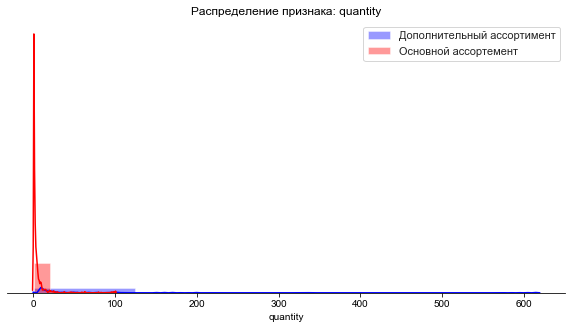

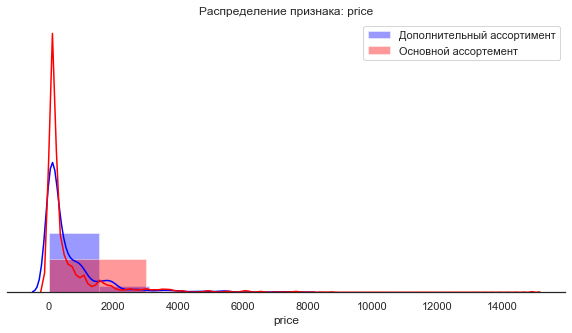

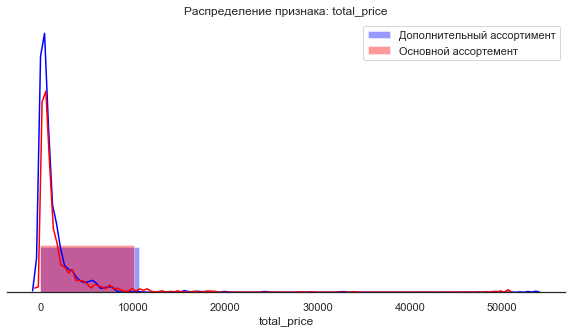

In [245]:
#создадим цикл для отрисовки распределения признаков c типом float в зависимости от типа ассортимента - создадим distplot график:

for col in good_logsMLprodgr.drop(['product_category_Все для ремонта', 'product_category_Все для уборки',\
                                    'product_category_Гладильные доски', 'product_category_Декор, интерьер, мебель',\
                                    'product_category_Ерши для унитаза и вантузы',\
                                    'product_category_Мелкая бытовая техника',\
                                   'product_category_Постельные принадлежности, текстиль, одеяла, наматрацники',\
                                   'product_category_Посуда и кухонные принадлежности',\
                                    'product_category_Растения (комнатные, рассада, прочие)', 'product_category_Прочие товары',\
                                    'product_category_Сумки-тележки',\
                                    'product_category_Сушилки для белья', 'product_category_Тазы, корыта, ведра, ковши',\
                                    'product_category_Товары для ванной',\
                                   'product_category_Урны, термометры, коврики придверные',\
                                   'product_category_Хранение вещей', 'assortment_type_Дополнительный',\
                                   'assortment_type_Основной', 'price_range_150-500 руб', 'price_range_до 150 руб',\
                                   'price_range_дороже 500 руб'],\
                                    axis = 1).columns:
    x1 = good_logsMLprodgr[good_logsMLprodgr['assortment_type_Основной']==0][col]
    x2 = good_logsMLprodgr[good_logsMLprodgr['assortment_type_Основной']==1][col]
    f, axes = plt.subplots(1, 1, figsize=(10, 5), sharex=True, sharey=True)
    sns.despine(left=True)
    sns.set(style="white", palette="muted", color_codes=True)
    sns.distplot(x1, bins=5, color="blue", label='Дополнительный ассортимент')
    sns.distplot(x2, bins=5, color='red',  label='Основной ассортемент')
    plt.title('Распределение признака: ' + col)

    plt.legend()
    plt.setp(axes, yticks=[])
    plt.show()

- На графике распределения видно, что количество единиц товара дополнительного ассортимента выше, чем у основного, тем не менее товары основного ассортимента в основном дороже, по этой причине общая стоимость купленных товаров основного ассортимента так же выше, чем у дополнительного.

In [246]:
# для признаков бинарного типа псмотрим паспределение на гистограммах

for col in good_logsMLprodgr.drop(['quantity', 'price', 'total_price', 'assortment_type_Дополнительный',\
                                  'assortment_type_Основной'], axis = 1).columns:  
    x1 = good_logsMLprodgr[good_logsMLprodgr['assortment_type_Основной']==0][col]
    x2 = good_logsMLprodgr[good_logsMLprodgr['assortment_type_Основной']==1][col]
    
    fig = go.Figure()
    fig.add_trace(go.Histogram(
    x=x1,
    name='Дополнительный', # name used in legend and hover labels
    marker_color='#EB89B5',
    opacity=0.75,
    
    ))
    fig.add_trace(go.Histogram(
    x=x2,
    name='Основной',
    marker_color='#330C73',
    opacity=0.75,
   
    ))

    fig.update_layout(
    title_text='Распределение признака: ' + col, # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
    )

    fig.show()

- Распределение показывает к какой категории относится товар и какое количество было продано, а также распределение по ценовому признаку.
Лидерами по количеству товаров, проданных в категории основного ассортимента можно назвать: Растения (комнатные, рассада, прочие/Посуда и кухонные принадлежности
По цене мы видем, что основной ассортимент преобладает в категории  товаров - до 150 (вероятно, засчет недорогих растений), востальных ценовых категориях также доминрует основной ассортимент.

In [247]:
#стандартизируем данные

scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(good_logsMLprodgr.drop(columns = ['assortment_type_Основной'])) 

In [248]:
#посмотрим что получилось на выходе - видим стандартизированные расстояния между признаками
print(x_sc[:5])

[[-2.19352483e-01  1.57311257e+00  2.96672537e-01 -1.82055905e-01
  -1.55598783e-01 -2.32003497e-01 -2.08835665e-01 -7.13527690e-02
  -1.09364988e-01 -1.25961142e-01  2.40178505e+00 -2.95289623e-01
  -7.48736309e-01 -2.19613498e-01 -2.06624447e-01 -1.52728956e-01
  -2.28956647e-01 -1.55598783e-01 -2.25876976e-01 -7.41884540e-01
  -6.06451078e-01 -8.79319960e-01  1.54568021e+00]
 [-2.19352483e-01  1.57311257e+00  2.96672537e-01 -1.82055905e-01
  -1.55598783e-01 -2.32003497e-01 -2.08835665e-01 -7.13527690e-02
  -1.09364988e-01 -1.25961142e-01  2.40178505e+00 -2.95289623e-01
  -7.48736309e-01 -2.19613498e-01 -2.06624447e-01 -1.52728956e-01
  -2.28956647e-01 -1.55598783e-01 -2.25876976e-01 -7.41884540e-01
  -6.06451078e-01 -8.79319960e-01  1.54568021e+00]
 [-1.69328799e-01  1.30621544e+00  8.65138182e-01 -1.82055905e-01
  -1.55598783e-01 -2.32003497e-01 -2.08835665e-01 -7.13527690e-02
  -1.09364988e-01 -1.25961142e-01  2.40178505e+00 -2.95289623e-01
  -7.48736309e-01 -2.19613498e-01 -2.066

In [249]:
# создадим матрицу расстояний
linked = linkage(x_sc, method = 'ward')
linked

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [1.52800000e+03, 1.54000000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.17900000e+03, 2.18500000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.73000000e+03, 4.73100000e+03, 7.86401091e+01, 8.39000000e+02],
       [4.73200000e+03, 4.73400000e+03, 9.35229849e+01, 1.17000000e+03],
       [4.73300000e+03, 4.73500000e+03, 1.02454592e+02, 2.36900000e+03]])

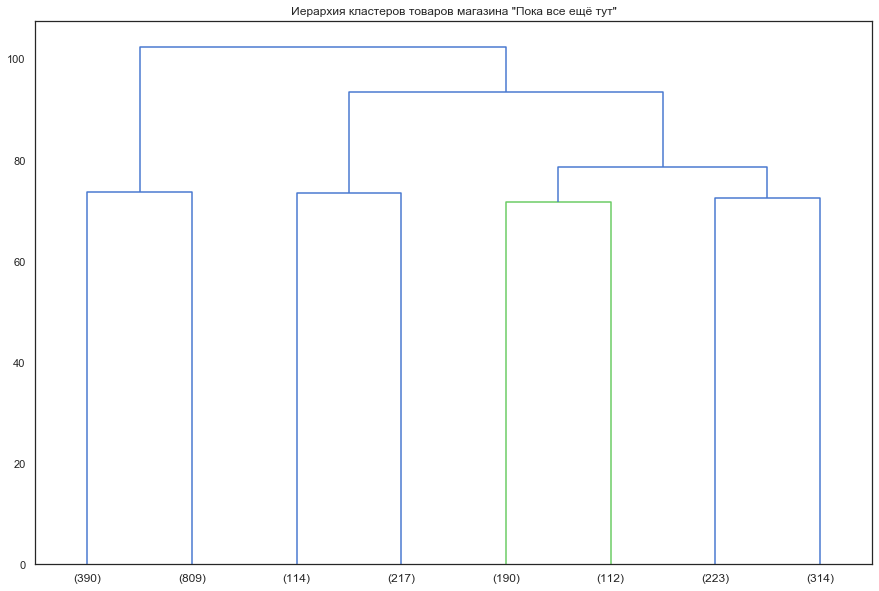

In [250]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', truncate_mode='lastp', p=8,)
plt.title('Иерархия кластеров товаров магазина "Пока все ещё тут"')
plt.show()

- Дендрограмма и матрица расстояний предлагают нам 8 кластеров, но но мы видим, что 2 кластера являются малочисленными, на фоне остальных (112 и 114). Для анализа результатов остановимся на 5 кластерах, укрупним данные.

In [251]:
# разделите наши данные на признаки (матрица X) и целевую переменную (y)
X = good_logsMLprodgr.drop('assortment_type_Основной', axis = 1)
y = good_logsMLprodgr['assortment_type_Основной']

In [252]:
#на основании алгоритма K-Means и спрогнозируем кластеры товаров 
sc = StandardScaler()
X_sc = sc.fit_transform(X)
km = KMeans(n_clusters = 5, random_state=0) # задаём число кластеров, равное 5
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров

In [253]:
#добавим к каждой строке (товару) датафрейма его кластер (который был определен методом KMeans выше):
good_logsMLprodgr['cluster_number'] = labels
good_logsMLprodgr

,quantity,price,total_price,product_category_Все для ремонта,product_category_Все для уборки,product_category_Гладильные доски,"product_category_Декор, интерьер, мебель",product_category_Ерши для унитаза и вантузы,product_category_Мелкая бытовая техника,"product_category_Постельные принадлежности, текстиль, одеяла, наматрацники",product_category_Посуда и кухонные принадлежности,product_category_Прочие товары,"product_category_Растения (комнатные, рассада, прочие)",product_category_Сумки-тележки,product_category_Сушилки для белья,"product_category_Тазы, корыта, ведра, ковши",product_category_Товары для ванной,"product_category_Урны, термометры, коврики придверные",product_category_Хранение вещей,assortment_type_Дополнительный,assortment_type_Основной,price_range_150-500 руб,price_range_до 150 руб,price_range_дороже 500 руб,cluster_number
0,1,2399.0,2399.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,2399.0,2399.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,2,2099.0,4198.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,10,22.0,220.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,10,142.0,1420.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,1,38.0,38.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
2365,16,38.0,608.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
2366,1,38.0,38.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
2367,14,38.0,532.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1


In [254]:
# посмотрим как разделились товары по кластерам, смый многочисленным оказался кластер №3, вероятно, в него попали товары 
# на которые имеется высокий потребительский спрос, рассмотрим более детально далее.

clucters_num = good_logsMLprodgr.groupby(['cluster_number']).agg({'assortment_type_Дополнительный': 'count'}).\
reset_index().sort_values(by='cluster_number', ascending=True)
clucters_num

,cluster_number,assortment_type_Дополнительный
0,0,555
1,1,1391
2,2,118
3,3,115
4,4,190


In [255]:
# выводим статистику по средним значениям наших признаков по кластеру
goods_clasters_average = good_logsMLprodgr.groupby(['cluster_number']).mean()
goods_clasters_average_tr = goods_clasters_average.transpose().reset_index()
goods_clasters_average_tr

cluster_number,index,0,1,2,3,4
0,quantity,2.499099,6.856937,2.161017,9.913043,2.300000
1,price,1934.681306,162.703816,944.284100,531.409565,114.225263
2,total_price,3748.992793,685.136592,1533.423729,1797.539130,198.300000
3,product_category_Все для ремонта,0.099099,0.015097,0.000000,0.000000,0.000000
4,product_category_Все для уборки,0.030631,0.028037,0.000000,0.000000,0.000000
5,product_category_Гладильные доски,0.149550,0.027318,0.000000,0.000000,0.000000
6,"product_category_Декор, интерьер, мебель",0.012613,0.066139,0.000000,0.000000,0.000000
7,product_category_Ерши для унитаза и вантузы,0.003604,0.007189,0.000000,0.000000,0.000000
8,product_category_Мелкая бытовая техника,0.046847,0.001438,0.000000,0.000000,0.000000
9,"product_category_Постельные принадлежности, текстиль, одеяла, наматрацники",0.037838,0.011503,0.000000,0.000000,0.000000


In [256]:
#построим распределение признаков по кластерам 
fig = go.Figure(data=[
    go.Bar(name='claster 0', x = goods_clasters_average_tr.iloc[[19,20], 0], y = goods_clasters_average_tr.iloc[[19,20], 1]),
    go.Bar(name='claster 1', x = goods_clasters_average_tr.iloc[[19,20], 0], y = goods_clasters_average_tr.iloc[[19,20], 2]),
    go.Bar(name='claster 2', x = goods_clasters_average_tr.iloc[[19,20], 0], y = goods_clasters_average_tr.iloc[[19,20], 3]),
    go.Bar(name='claster 3', x = goods_clasters_average_tr.iloc[[19,20], 0], y = goods_clasters_average_tr.iloc[[19,20], 4]),
    go.Bar(name='claster 4', x = goods_clasters_average_tr.iloc[[19,20], 0], y = goods_clasters_average_tr.iloc[[19,20], 5]),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Распределение средних значений признаков для 5 кластеров клиентов')
fig.show()

Кластер 1 имеет большую стоимость товара, в кластере 2 и 3 цена товара ниже. Благодаря более высокой цене, кластер 1 дает нам большую среднюю общую стоимость товаров. 

In [257]:
#построим распределение признаков по кластерам
fig = go.Figure(data=[
    go.Bar(name='claster 0', x = goods_clasters_average_tr.iloc[[21, 22, 23], 0], y = goods_clasters_average_tr.iloc[[21, 22, 23], 1]),
    go.Bar(name='claster 1', x = goods_clasters_average_tr.iloc[[21, 22, 23], 0], y = goods_clasters_average_tr.iloc[[21, 22, 23], 2]),
    go.Bar(name='claster 2', x = goods_clasters_average_tr.iloc[[21, 22, 23], 0], y = goods_clasters_average_tr.iloc[[21, 22, 23], 3]),
    go.Bar(name='claster 3', x = goods_clasters_average_tr.iloc[[21, 22, 23], 0], y = goods_clasters_average_tr.iloc[[21, 22, 23], 4]),
    go.Bar(name='claster 4', x = goods_clasters_average_tr.iloc[[21, 22, 23], 0], y = goods_clasters_average_tr.iloc[[21, 22, 23], 5]),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Распределение средних значений признаков для 5 кластеров клиентов')
fig.show()

Основная масса товаров кластера 1 - это товары каегории 500+ рублей, кластер 2 и 3 - примерно поровну товары до 150 и 150-500 рублей.

In [259]:
#построим распределение признаков по кластерам
fig = go.Figure(data=[
    go.Bar(name='claster 0', x = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 0], y = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 1]),
    go.Bar(name='claster 1', x = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 0], y = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 2]),
    go.Bar(name='claster 2', x = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 0], y = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 3]),
    go.Bar(name='claster 3', x = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 0], y = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 4]),
    go.Bar(name='claster 4', x = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 0], y = goods_clasters_average_tr.iloc[[3, 4, 5, 6, 7], 5]),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Распределение средних значений признаков для 5 кластеров клиентов')
fig.show()

- В интересующих нас кластерах присутствубт категории: Все для ремонта, Все для уборки, Гладильные доски, значит нужно выделить их в одни из приоритетных. Категория Ерши для унитаза и вантузы - присутствует слишком незначительно, для ее приоритезации. :)

In [260]:
#построим распределение признаков по кластерам
fig = go.Figure(data=[
    go.Bar(name='claster 0', x = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 0], y = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 1]),
    go.Bar(name='claster 1', x = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 0], y = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 2]),
    go.Bar(name='claster 2', x = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 0], y = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 3]),
    go.Bar(name='claster 3', x = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 0], y = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 4]),
    go.Bar(name='claster 4', x = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 0], y = goods_clasters_average_tr.iloc[[8, 9, 10, 11, 12], 5]),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Распределение средних значений признаков для 5 кластеров клиентов')
fig.show()

- В кластерах 1, 2 и 3 незначительно присутствуют категории - мелкая бытовая техника, постельные принадлежности и текстиль, а явно выражены категории  Посуда и кухонные принадлежности (100%) и Растения (более 94%) - на них нужно особо обратить внимание.

In [261]:
#построим распределение признаков по кластерам
fig = go.Figure(data=[
    go.Bar(name='claster 0', x = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 0], y = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 1]),
    go.Bar(name='claster 1', x = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 0], y = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 2]),
    go.Bar(name='claster 2', x = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 0], y = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 3]),
    go.Bar(name='claster 3', x = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 0], y = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 4]),
    go.Bar(name='claster 4', x = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 0], y = goods_clasters_average_tr.iloc[[13, 14, 15, 16, 17], 5]),
])
# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title_text='Распределение средних значений признаков для 5 кластеров клиентов')
fig.show()

В кластерах 1, 2 и 3 присутствуют категории - Сумки-тележки (17,7%), Товары для ванной (13,6%) Сушилки для белья (15,7%), Уличные урны, уличныетермометры и придверные коврики (6,6%)- на них так же нужно особо обратить внимание.

#### Таким образом, алгоритм машинного обучения рекомендует нам сфокусоироваться на следующих категориях товаров

Сегмент товаров в ценовом диапазоне **дешевле 500 рублей** в категориях:
  - Растения (комнатные, рассада, прочие) и Посуда и кухонные принадлежности - приоритет 1,
   с большим отрывом и гораздо меньшим приоритетом далее идут категории:
  - Гладильные доски - приоритет 2
  - Сумки-тележки приоритет - приоритет 3
  - Сушилки для белья - приоритет 4


Сегмент товаров в ценовом диапазоне **дороже 500 рублей** в категориях: 
- Сумки-тележки - приоритет 1, 
- Сушилки для белья - приоритет 2, 
- Гладильные доски - приоритет 3,
- Товары для ванной 4,
- Все для ремонта - приоритет 5
- Хранение вещей 6
- Уличные урны, уличные термометры и придверные коврики - приоритет 7,
- Мелкая бытовая техника - приоритет 8
- Постельные принадлежности - приоритет 9
- Все для уборки - приоритет 10
- Растения (комнатные, рассада, прочие) - приоритет 11



Наименьшей приоритетностью обладают категории
- Декор, интерьер, мебель; Тазы, корыта, ведра, ковши; Ерши для унитаза и вантузы; Прочие товары




## Общий вывод:

#### Вывод по шагу 1
Файл открыт и первично изучен.

#### Вывод по шагу 2 
Пропуски и дубликаты отсутствуют, названия столбцов корректны, типы данных приведены требуемым.

#### Выводы по шагу 3

- Изучите распределение данных - есть ли аномальные значения (выбросы)? Определите порог отcечения аномалий, если от них следует избавиться. Предположите причины наличия таких аномалий:
   - удалены дублирующиеся по времени заказы - составлен баг-репорт
   - удален заказ с аномальным заказом товаров -  составлен баг-репорт
   - составлен баг-репорт о наличии заказов, привязанного к разным id пользователей
    
- Исследуйте среднее количество товаров в 1 заказе. Среднюю/минимальную и максимальную цену товара.
  - Минимальное количество товаров в заказе: 1
  - Среднее количество товаров в заказе: 1
  - Максимальнее количество товаров в заказе: 51      
  - Минимальная цена товара ассортимента: 9 руб.
  - Средняя цена товара ассортимента: 150 руб., 50% товаров ее не превышают.
  - Максимальная цена товара ассортимента: 14917 руб.
  - Для 75% товаров цена не превышает: 498 руб.
  
- Изучите среднюю стоимость заказа, максимальный и минимальный размер стоимости заказа. Границу стоимости 75% заказов.
  - Минимальная стоимость заказа: 14 руб.
  - Средняя стоимость заказа: 689 руб., 50% заказов ее не превышают.
  - Максимальная стоимость заказа: 49432 руб.
  - 75% заказов не превышают: 1474 руб.

- Категоризируйте товары в ассортименте по ценовому сегменту 
  - присвоены ценовые категории до 150 руб, 150-500 руб, дороже 500 руб. 

- Разделите ассортимент товаров на основной и дополнительный. 
  - ассортимент разделен.
К основному ассортименту были отнесены категории топ 5 товаров по объему выручки:
  - 'Сумки-тележки',
  - 'Растения (комнатные, рассада, прочие)',
  - 'Посуда и кухонные принадлежности',
  - 'Гладильные доски',
  - 'Сушилки для белья'
  

#### Выводы по шагу 4:

- Траты людей зависят от времени суток и дня недели

- За год большинство клиентов потратило меньше 1000 в магазине

- Вероятность того, что различия в средней стоимости товаров основного и дополнительного ассортимента обнаружены случайно меньше критического уровня альфа 5%, который мы взяли как оптимальный, соответственно, мы можем сказать, что Cредняя стоимость товаров основного и дополнительного ассортимента с большой вероятностью отличается.
  
#### Выводы по шагу 5
 
Таким образом, алгоритм машинного обучения рекомендует нам сфокусироваться на следующих категориях товаров:

Сегмент товаров в ценовом диапазоне **дешевле 500 рублей** в категориях:
- Растения (комнатные, рассада, прочие) и Посуда и кухонные принадлежности - приоритет 1,
   с большим отрывом и гораздо меньшим приоритетом далее идут категории:
- Гладильные доски - приоритет 2
- Сумки-тележки приоритет - приоритет 3
- Сушилки для белья - приоритет 4


Сегмент товаров в ценовом диапазоне **дороже 500 рублей** в категориях: 
- Сумки-тележки - приоритет 1, 
- Сушилки для белья - приоритет 2, 
- Гладильные доски - приоритет 3,
- Товары для ванной 4,
- Все для ремонта - приоритет 5
- Хранение вещей 6
- Уличные урны, уличные термометры и придверные коврики - приоритет 7,
- Мелкая бытовая техника - приоритет 8
- Постельные принадлежности - приоритет 9
- Все для уборки - приоритет 10
- Растения (комнатные, рассада, прочие) - приоритет 11



**Наименьшей приоритетностью обладают категории:**
Декор, интерьер, мебель; Тазы, корыта, ведра, ковши; Ерши для унитаза и вантузы; Прочие товары


### Выводы по шагу 6

Топ 5 категорий товаров по объему выручки (63%):
   - 'Сумки-тележки',
   - 'Растения (комнатные, рассада, прочие)',
   - 'Посуда и кухонные принадлежности',
   - 'Гладильные доски',
   - 'Сушилки для белья'
   
В разрезе по ценовым категориям, следует сфокусироваться на следующих категориях (в порядке приоритетности)

Сегмент товаров в ценовом диапазоне **дешевле 500 рублей** в категориях:
  - Растения (комнатные, рассада, прочие) и Посуда и кухонные принадлежности - приоритет 1,
   с большим отрывом и гораздо меньшим приоритетом далее идут категории:
  - Гладильные доски - приоритет 2
  - Сумки-тележки приоритет - приоритет 3
  - Сушилки для белья - приоритет 4


Сегмент товаров в ценовом диапазоне **дороже 500 рублей** в категориях: 
- Сумки-тележки - приоритет 1, 
- Сушилки для белья - приоритет 2, 
- Гладильные доски - приоритет 3,
- Товары для ванной 4,
- Все для ремонта - приоритет 5
- Хранение вещей 6
- Уличные урны, уличные термометры и придверные коврики - приоритет 7,
- Мелкая бытовая техника - приоритет 8
- Постельные принадлежности - приоритет 9
- Все для уборки - приоритет 10
- Растения (комнатные, рассада, прочие) - приоритет 11

Наименьшей приоритетностью обладают категории:
Декор, интерьер, мебель; Тазы, корыта, ведра, ковши; Ерши для унитаза и вантузы; Прочие товары

Ссылка на презентацию: https://yadi.sk/i/vV6o7JtYtzp4IA

Документация, которая использовалась в процессе работы в качестве дополнительной:

- 1) https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html - синтаксис query
- 2) https://plotly.com/python/box-plots/ - ящик с уcами Plotly
- 3) https://express.liberty7.ru/blog/rynok-diy-dacha-sad-rossii - типы категорий товаров для дома и сада
- 4) https://stackoverflow.com/questions/51527011/how-to-sum-dtype-timedelta64ns-in-pandas-python - как применять арифметические операции с форматом данных timedelta64[ns]
- 5) https://market.yandex.ru/search?rs=eJwz0vTiFuI0tTAxMjI2MDQEc8yNDMwsDC2NQBwzE0tjI3MDU5MIBgCg7gd-&text=%D1%81%D1%82%D1%8F%D0%B6%D0%BA%D0%B0%20%D0%BE%D0%BA%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F%20%D1%81%20%D0%B1%D0%BE%D0%BB%D1%82%D0%BE%D0%BC%20%D1%81%D1%82-55%20%D1%86%D0%B8%D0%BD%D0%BA&clid=698&lr=118276&local-offers-first=1&onstock=1 - детализация по названию товара на Яндекс.Маркет
- 6) https://www.brabantia-shop.ru/collection/steklyannye-banki-dlya-khraneniya?utm_source=yandex&utm_medium=cpc&utm_campaign=Brendovie_poisk_SPB%7C%7C39666618&utm_content=6766260170%7C%7CCorrection_{coef-goal-context-id}&utm_term=%D1%81%D1%82%D0%B5%D0%BA%D0%BB%D1%8F%D0%BD%D0%BD%D0%B0%D1%8F%20brabantia&yclid=1937977198053985552 конкретизауия цены и категории товара
- 7) https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/ - особенности отрисовки дендрограммы
- 8) https://fooobar.com/questions/13665691/refresh-indices-in-pandas-dataframe - обновление индексов после удаления строк